In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn import *
from keras.layers import Input, add
from keras.layers.core import Dense, Dropout, Activation, Flatten, Reshape
from keras.models import Model

In [ ]:
mean = [0, 0, 0]
cov = [[1, 0.8, 0.8], [0.8, 1, 0.8], [0.8, 0.8, 1]] 
X1,X2,X3=np.random.multivariate_normal(mean, cov, 1000).T 

In [ ]:
x_train=[]
for i in range(800):
  x_train.append([X1[i], X2[i], X3[i]])
#now data is the 2x1 matrix containing all the points of class 1

x_test=[]
for i in range(801, 1000):
  x_test.append([X1[i], X2[i], X3[i]])

In [ ]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

NormalizeData(x_train)


array([[0.70795217, 0.73747986, 0.6380407 ],
       [0.33423602, 0.53077878, 0.62291553],
       [0.42503284, 0.40769468, 0.50768158],
       ...,
       [0.50302025, 0.41086586, 0.4742622 ],
       [0.58252542, 0.58373893, 0.61851332],
       [0.67916985, 0.51597767, 0.47568535]])

In [ ]:
lr=0.01
def sig(val):
  res=1/(1+np.exp(-val))
  return res

def sigder(val):
  res=sig(val)*(1-sig(val))
  return res

def make_a(start, skip_size, w1, x):
  a=0
  ct=0
  for i in range(start,6,skip_size):
    a+=w1[i]*x[ct]
    ct+=1
  return a

def make_del(a, x):
  res=-2*(x-sig(a))*sigder(a)
  return res

def updwts(w2, delta2, z1):
  arr=[]
  for i in range(6):
    arr.append(w2[i]-lr*delta2[i%3]*z1[i//3])
  return arr

def updwts2(w1, delta1, x):
  arr=[]
  for i in range(6):
    arr.append(w1[i]-lr*delta1[i%2]*x[i//3])
  return arr


[2.742593570015999, 3.2895925396125594, 2.742593570015999, 2.2794154764052403, 3.1040970243792607, 2.2794154764052403]
[0.07267399465313995, 0.7828870223828084, 0.7749589801792761, 0.680760768944713, 0.0077822401157984535, 0.01191330121173635]


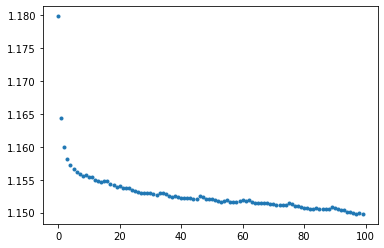

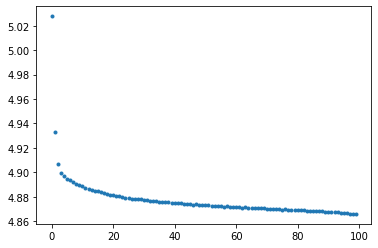

In [ ]:
epoch=100

import random

w1=np.array([1,1,1,1,1,1])
w2=np.array([1,1,1,1,1,1])
er=[]
ep=[]
er2=[]
ep2=[]
mini=10
for e in range(epoch):
  sum=0
  for x1,x2,x3 in x_train:
    
    a1=[]
    a2=[]
    x=[x1,x2,x3]
    a1.append(make_a(0, 2, w1, x))
    a1.append(make_a(1, 2, w1, x))

    z1=[0,0]
    z1[0]=sig(a1[0])
    z1[1]=sig(a1[1])

    a2.append(make_a(0, 3, w2, z1))
    a2.append(make_a(1, 3, w2, z1))
    a2.append(make_a(2, 3, w2, z1))

    z2=[0,0,0]
    z2[0]=sig(a2[0])
    z2[1]=sig(a2[1])
    z2[2]=sig(a2[2])

    delta2=[]
    delta2.append(make_del(a2[0], x[0]))
    delta2.append(make_del(a2[1], x[1]))
    delta2.append(make_del(a2[2], x[2]))

    w2new=[]
    w2new=w2new + updwts(w2, delta2, z1)

    delta1=[]
    delta1.append(delta2[0]*w2[0]*sigder(a1[0]) + delta2[1]*w2[1]*sigder(a1[0]) + delta2[2]*w2[2]*sigder(a1[0]))
    delta1.append(delta2[0]*w2[3]*sigder(a1[1]) + delta2[1]*w2[4]*sigder(a1[1]) + delta2[2]*w2[5]*sigder(a1[1]))

    w1new=[]
    w1new+=updwts2(w1, delta1, x)
    w1=w1new
    w2=w2new
    sum+=((z2[0]-x1)*(z2[0]-x1) + (z2[1]-x2)*(z2[1]-x2) + (z2[2]-x3)*(z2[2]-x3))/3
  er2.append(sum/200)
  if(sum/200<mini):
    mini=sum/200
  ep2.append(e)

  sum=0
  for x1,x2,x3 in x_test:
    
    a1=[]
    a2=[]
    x=[x1,x2,x3]
    a1.append(make_a(0, 2, w1, x))
    a1.append(make_a(1, 2, w1, x))

    z1=[0,0]
    z1[0]=sig(a1[0])
    z1[1]=sig(a1[1])

    a2.append(make_a(0, 3, w2, z1))
    a2.append(make_a(1, 3, w2, z1))
    a2.append(make_a(2, 3, w2, z1))

    z2=[0,0,0]
    z2[0]=sig(a2[0])
    z2[1]=sig(a2[1])
    z2[2]=sig(a2[2])

    sum+=((z2[0]-x1)*(z2[0]-x1) + (z2[1]-x2)*(z2[1]-x2) + (z2[2]-x3)*(z2[2]-x3))/3
  
  er.append(sum/200)
  if(sum/200<mini):
    mini=sum/200
  ep.append(e)
  #print(sum/200)
  random.shuffle(x_train)
  random.shuffle(x_test)
print(w1)
print(w2)
  
plt.plot(ep, er, '.')
#plt.axis('equal')
plt.show()
plt.plot(ep2, er2, '.')
#plt.axis('equal')
plt.show()





In [ ]:
print(mini)

1.1497906963989395


In [ ]:
def sigm(a):
  res=1/(1+torch.exp(a))
  return res
  
def error(y, y_pred):
  return ((y_pred - y)**2).mean()

def forward(x,wts1,wts2):
    a1=torch.mm(x, wts1)
    z1=sigm(a1)
    a2=torch.mm(z1, wts2)
    z2=sigm(a2)
    return a1,z1,a2,z2 

import torch
er=[]
ep=[]
ert=[]
lr=0.1
epoch=100
wts1=torch.ones(3, 2,requires_grad=True, dtype=torch.float32)
wts2=torch.ones(2, 3,requires_grad=True, dtype=torch.float32)

for epo in range(epoch):
  x=torch.tensor(x_train, dtype=torch.float32)
  x_test=torch.tensor(x_test, dtype=torch.float32)

  a1,z1,a2,z2= forward(x, wts1, wts2)
  a21,z21,a22,z22 = forward(x_test, wts1, wts2)
  
  e=error(z2, x)
  er2=error(z22, x_test)
  e.backward()

  #print(wts1.grad)
  with torch.no_grad():
    wts1-=lr*wts1.grad
    wts2-=lr*wts2.grad
  
  er.append(e)
  ert.append(er2)
  ep.append(epo)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


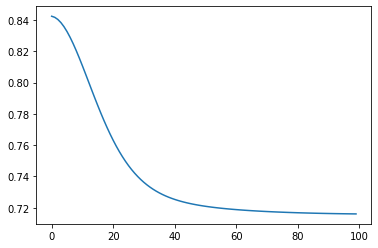

In [ ]:
plt.plot(ep, er)
plt.show()

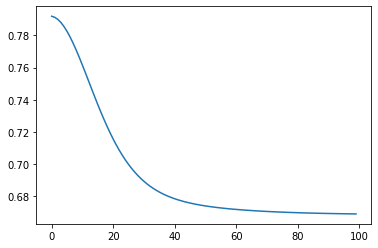

In [ ]:
plt.plot(ep, ert)
plt.show()

Result: Autograd performs better 